In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('CC GENERAL.csv')
df.drop('CUST_ID', axis=1, inplace=True)
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean())
df = df.dropna(axis = 0, subset = ['CREDIT_LIMIT'])

In [ ]:
# from _typeshed import Self
class PCA ():

    def __init__(self,n_components = 0.95):
        self.n_components = n_components
        if self.n_components > 1:
            self.type = 'var'
        else:
            self.type = 'ratio'

    def fit(self,X):
        self.mean=X.mean(axis=0)
        self.std=X.std(axis=0)
        X = (X - self.mean) / self.std
        C = np.cov(X)

        eigenvalues, eigenvectors = np.linalg.eig(C)
        if self.type == 'var':
          sorted_indices = np.argsort(eigenvalues)[::-1]
          self.components = eigenvectors[:, sorted_indices[:self.n_components]]


        else:
            total_variance = np.sum(eigenvalues)
            explained_variance_ratio = eigenvalues / total_variance
            cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)
            selected_components = np.where(cumulative_explained_variance_ratio >= self.n_components)[0][0] + 1
            self.components = eigenvectors[:, :selected_components]




    def transform(self, Z):
        Z_new = (Z_new - self.mean) / self.std
        Z_transformed = np.dot(Z_new, self.components)
        return Z_transformed


    #optional
    def plot_explained_variance(self):
        pass



In [ ]:
class PCA():

    def __init__(self, n_components=0.95):
        self.n_components = n_components
        if self.n_components > 1:
            self.type = 'var'
        else:
            self.type = 'ratio'

    def fit(self, X):
        self.mean = X.mean(axis=0)
        self.std = X.std(axis=0)
        X_std = (X - self.mean) / self.std
        self.C = np.cov(X_std.T)

        eigenvalues, eigenvectors = np.linalg.eig(self.C)
        if self.type == 'var':
            sorted_indices = np.argsort(eigenvalues)[::-1]
            self.components = eigenvectors[:, sorted_indices[:self.n_components]]
        else:
            total_variance = np.sum(eigenvalues)
            self.explained_variance_ratio = eigenvalues / total_variance
            self.cumulative_explained_variance_ratio = np.cumsum( self.explained_variance_ratio)
            selected_components = np.where( self.cumulative_explained_variance_ratio >= self.n_components) [0][0]
            self.components = eigenvectors[:, :selected_components]

    def transform(self, Z):
        Z_new = (Z -self.mean)
        Z_transformed = np.dot(Z_new, self.components)
        return Z_transformed

    # optional
    def plot_explained_variance(self):
        plt.plot(self.cumulative_explained_variance_ratio)
        plt.axhline(y=0.95, color='r', linestyle='--')
        plt.show()

In [ ]:
pca_section = PCA(n_components=.95)
X_transofmed = pca_section.fit(df.values)

In [ ]:
print(pca_section.components.shape)
print("expected shape: (17,5)")

(17, 11)
expected shape: (17,5)


In [ ]:
pca_section.transform(df.values).shape

(8949, 11)

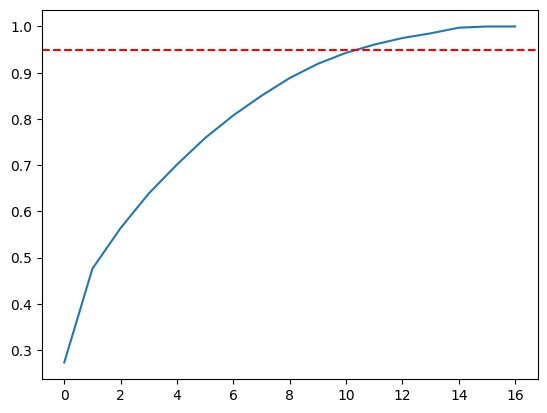

In [ ]:
pca_section.plot_explained_variance()